Data Collection: Simulate data from academic, financial, and library usage sources.

Data Integration: Combine data into a single DataFrame to simulate a data warehouse.

Save Data: Save the integrated data to a SQLite database or CSV file.

Load Data: Load data from the SQLite database or CSV file for analysis.

Data Preprocessing: Handle missing values, encode categorical variables, and drop unnecessary columns.

Random Forest Model: Build and evaluate a Random Forest model to predict student performance.

Clustering: Use K-Means clustering to group students based on attendance and final scores, and visualize the clusters.

<h1>Section 1: Simulate Data Collection from Multiple Sources</h1>

In [11]:
import pandas as pd
import sqlite3

# ==================================================
# Step 1: Simulate Data Collection from Multiple Sources
# ==================================================

# Source 1: Academic Data
academic_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Name": ["John Doe", "Jane Smith", "Alice Johnson", "Bob Brown", "Charlie Davis", 
             "Eva Green", "Frank White", "Grace Black", "Henry Wilson", "Ivy Lee"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Age": [20, 22, 21, 23, 20, 22, 21, 24, 20, 23],
    "Department": ["Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science"],
    "Year_of_Study": [2, 3, 1, 2, 3, 1, 2, 3, 1, 2],
    "Attendance": [85.5, 90.0, 70.0, 80.0, 75.0, 95.0, 65.0, 85.0, 60.0, 88.0],
    "Assignment_Score": [75.0, 88.5, 60.0, 70.0, 65.0, 90.0, 55.0, 80.0, 50.0, 85.0],
    "Midterm_Score": [65.0, 92.5, 55.0, 60.0, 70.0, 85.0, 50.0, 75.0, 45.0, 80.0],
    "Final_Score": [70.0, 85.0, 50.0, 65.0, 75.0, 90.0, 55.0, 80.0, 40.0, 82.0],
    "Grades": ["C", "A", "F", "D", "C", "A", "F", "B", "F", "B"],
    "Performance": ["Pass", "Pass", "Fail", "Fail", "Pass", "Pass", "Fail", "Pass", "Fail", "Pass"]
}

# Source 2: Financial Data
financial_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Tuition_Paid": [500000, 750000, 300000, 600000, 400000, 800000, 350000, 700000, 250000, 900000],
    "Outstanding_Balance": [0, 250000, 500000, 100000, 300000, 0, 450000, 0, 600000, 0]
}

# Source 3: Library Usage Data
library_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Books_Borrowed": [10, 5, 2, 8, 3, 12, 1, 7, 0, 15],
    "Library_Visits": [20, 15, 5, 18, 10, 25, 3, 22, 2, 30]
}

# Create DataFrames for each source
academic_df = pd.DataFrame(academic_data)
financial_df = pd.DataFrame(financial_data)
library_df = pd.DataFrame(library_data)

<h1>Section 2: Simulate Data Integration into a Data Warehouse</h1>

In [12]:
# ==================================================
# Step 2: Simulate Data Integration into a Data Warehouse
# ==================================================

# Merge all datasets into a single DataFrame (simulating a data warehouse)
data_warehouse = pd.merge(academic_df, financial_df, on="Student_ID", how="left")
data_warehouse = pd.merge(data_warehouse, library_df, on="Student_ID", how="left")

# Display the integrated data warehouse
print("Integrated Data Warehouse:")
data_warehouse.head()

Integrated Data Warehouse:


,Student_ID,Name,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Grades,Performance,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits
0,1001,John Doe,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,C,Pass,500000,0,10,20
1,1002,Jane Smith,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,A,Pass,750000,250000,5,15
2,1003,Alice Johnson,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,F,Fail,300000,500000,2,5
3,1004,Bob Brown,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,D,Fail,600000,100000,8,18
4,1005,Charlie Davis,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,C,Pass,400000,300000,3,10


<h1>Section 3: Save Data to a Data Warehouse</h1>

In [13]:
# ==================================================
# Step 3: Save Data to a Data Warehouse
# ==================================================

# Option 1: Save to a SQLite Database
def save_to_sqlite(data, db_name="data_warehouse.db", table_name="student_data"):
    # Connect to SQLite database (creates it if it doesn't exist)
    conn = sqlite3.connect(db_name)
    # Save the DataFrame to the database
    data.to_sql(table_name, conn, if_exists="replace", index=False)
    print(f"\nData saved to SQLite database: {db_name}, Table: {table_name}")
    # Close the connection
    conn.close()

# Save the data warehouse to SQLite
save_to_sqlite(data_warehouse)

# Option 2: Save to a CSV File
def save_to_csv(data, file_name="data_warehouse.csv"):
    data.to_csv(file_name, index=False)
    print(f"\nData saved to CSV file: {file_name}")

# Save the data warehouse to CSV
save_to_csv(data_warehouse)


Data saved to SQLite database: data_warehouse.db, Table: student_data

Data saved to CSV file: data_warehouse.csv


<h1>Section 4: Load Data from the Data Warehouse for Analysis</h1>

In [14]:
# ==================================================
# Step 4: Load Data from the Data Warehouse for Analysis
# ==================================================

# Option 1: Load from SQLite Database
def load_from_sqlite(db_name="data_warehouse.db", table_name="student_data"):
    conn = sqlite3.connect(db_name)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql(query, conn)
    conn.close()
    return data

# Load data from SQLite
loaded_data_sqlite = load_from_sqlite()
print("\nData loaded from SQLite database:")
loaded_data_sqlite.head()



Data loaded from SQLite database:


,Student_ID,Name,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Grades,Performance,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits
0,1001,John Doe,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,C,Pass,500000,0,10,20
1,1002,Jane Smith,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,A,Pass,750000,250000,5,15
2,1003,Alice Johnson,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,F,Fail,300000,500000,2,5
3,1004,Bob Brown,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,D,Fail,600000,100000,8,18
4,1005,Charlie Davis,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,C,Pass,400000,300000,3,10


In [15]:

# Option 2: Load from CSV File
def load_from_csv(file_name="data_warehouse.csv"):
    return pd.read_csv(file_name)

# Load data from CSV
loaded_data_csv = load_from_csv()
print("\nData loaded from CSV file:")
loaded_data_csv.head()


Data loaded from CSV file:


,Student_ID,Name,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Grades,Performance,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits
0,1001,John Doe,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,C,Pass,500000,0,10,20
1,1002,Jane Smith,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,A,Pass,750000,250000,5,15
2,1003,Alice Johnson,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,F,Fail,300000,500000,2,5
3,1004,Bob Brown,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,D,Fail,600000,100000,8,18
4,1005,Charlie Davis,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,C,Pass,400000,300000,3,10


<h1>Section 5: Load Data from the Data Warehouse</h1>

In [16]:
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ==================================================
# Step 1: Load Data from the Data Warehouse
# ==================================================

# Option 1: Load from SQLite Database
def load_from_sqlite(db_name="data_warehouse.db", table_name="student_data"):
    conn = sqlite3.connect(db_name)
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql(query, conn)
    conn.close()
    return data

# Option 2: Load from CSV File
def load_from_csv(file_name="data_warehouse.csv"):
    return pd.read_csv(file_name)

# Load data (choose either SQLite or CSV)
data_warehouse = load_from_sqlite()  # or load_from_csv()

# Display the loaded data
print("Loaded Data Warehouse:")
data_warehouse.head()

Loaded Data Warehouse:


,Student_ID,Name,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Grades,Performance,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits
0,1001,John Doe,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,C,Pass,500000,0,10,20
1,1002,Jane Smith,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,A,Pass,750000,250000,5,15
2,1003,Alice Johnson,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,F,Fail,300000,500000,2,5
3,1004,Bob Brown,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,D,Fail,600000,100000,8,18
4,1005,Charlie Davis,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,C,Pass,400000,300000,3,10


<h1>Section 6: Data Preprocessing</h1>

In [17]:
# ==================================================
# Step 2: Data Preprocessing
# ==================================================

# Check for missing values
print("\nMissing Values:")
print(data_warehouse.isnull().sum())

# Fill missing values (if any)
data_warehouse.fillna(0, inplace=True)

# Encode categorical variables
data_warehouse = pd.get_dummies(data_warehouse, columns=["Gender", "Department", "Performance"], drop_first=True)

# Drop non-numeric columns that are not needed for modeling
data_warehouse = data_warehouse.drop(["Student_ID", "Name", "Grades"], axis=1)

# Display the preprocessed DataFrame
print("\nPreprocessed Dataset:")
data_warehouse.head()


Missing Values:
Student_ID             0
Name                   0
Gender                 0
Age                    0
Department             0
Year_of_Study          0
Attendance             0
Assignment_Score       0
Midterm_Score          0
Final_Score            0
Grades                 0
Performance            0
Tuition_Paid           0
Outstanding_Balance    0
Books_Borrowed         0
Library_Visits         0
dtype: int64

Preprocessed Dataset:


,Age,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits,Gender_Male,Department_Computer Science,Department_Electrical Engineering,Performance_Pass
0,20,2,85.5,75.0,65.0,70.0,500000,0,10,20,True,True,False,True
1,22,3,90.0,88.5,92.5,85.0,750000,250000,5,15,False,False,True,True
2,21,1,70.0,60.0,55.0,50.0,300000,500000,2,5,False,False,False,False
3,23,2,80.0,70.0,60.0,65.0,600000,100000,8,18,True,True,False,False
4,20,3,75.0,65.0,70.0,75.0,400000,300000,3,10,True,False,True,True


<h1>Section 7: Build a Random Forest Model</h1>

In [18]:
# ==================================================
# Step 3: Build a Random Forest Model
# ==================================================

# Features and target variable
X = data_warehouse.drop(["Performance_Pass"], axis=1)  # Features
y = data_warehouse["Performance_Pass"]  # Target: 1 for Pass, 0 for Fail

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy * 100:.2f}%")


Random Forest Model Accuracy: 100.00%


<h1>Section 8: Plot Student Performance Clusters</h1>

C:\Users\GOD IS ALL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GOD IS ALL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


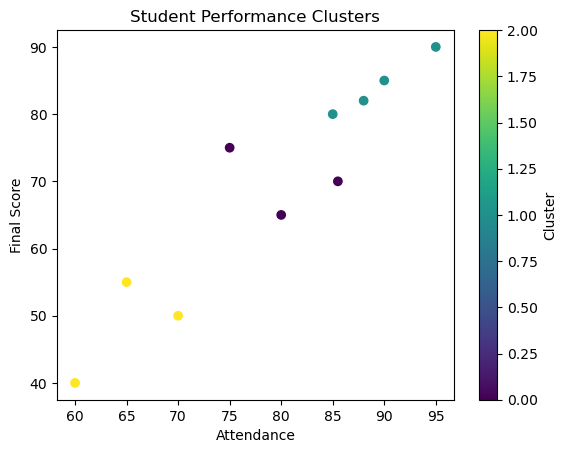

In [19]:
# ==================================================
# Step 4: Plot Student Performance Clusters
# ==================================================

# Features for clustering
X_cluster = data_warehouse[["Attendance", "Final_Score"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_warehouse["Cluster"] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.scatter(data_warehouse["Attendance"], data_warehouse["Final_Score"], c=data_warehouse["Cluster"], cmap="viridis")
plt.title("Student Performance Clusters")
plt.xlabel("Attendance")
plt.ylabel("Final Score")
plt.colorbar(label="Cluster")
plt.show()

In [20]:
import pandas as pd
import sqlite3

# ==================================================
# Step 1: Simulate Data Collection from Multiple Sources
# ==================================================

# Source 1: Academic Data
academic_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Name": ["John Doe", "Jane Smith", "Alice Johnson", "Bob Brown", "Charlie Davis", 
             "Eva Green", "Frank White", "Grace Black", "Henry Wilson", "Ivy Lee"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Age": [20, 22, 21, 23, 20, 22, 21, 24, 20, 23],
    "Department": ["Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science", "Electrical Engineering", "Business Administration", 
                   "Computer Science"],
    "Year_of_Study": [2, 3, 1, 2, 3, 1, 2, 3, 1, 2],
    "Attendance": [85.5, 90.0, 70.0, 80.0, 75.0, 95.0, 65.0, 85.0, 60.0, 88.0],
    "Assignment_Score": [75.0, 88.5, 60.0, 70.0, 65.0, 90.0, 55.0, 80.0, 50.0, 85.0],
    "Midterm_Score": [65.0, 92.5, 55.0, 60.0, 70.0, 85.0, 50.0, 75.0, 45.0, 80.0],
    "Final_Score": [70.0, 85.0, 50.0, 65.0, 75.0, 90.0, 55.0, 80.0, 40.0, 82.0],
    "Grades": ["C", "A", "F", "D", "C", "A", "F", "B", "F", "B"],
    "Performance": ["Pass", "Pass", "Fail", "Fail", "Pass", "Pass", "Fail", "Pass", "Fail", "Pass"]
}

# Source 2: Financial Data
financial_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Tuition_Paid": [500000, 750000, 300000, 600000, 400000, 800000, 350000, 700000, 250000, 900000],
    "Outstanding_Balance": [0, 250000, 500000, 100000, 300000, 0, 450000, 0, 600000, 0]
}

# Source 3: Library Usage Data
library_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Books_Borrowed": [10, 5, 2, 8, 3, 12, 1, 7, 0, 15],
    "Library_Visits": [20, 15, 5, 18, 10, 25, 3, 22, 2, 30]
}

# Source 4: Family Background Data
family_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Parents_Education": ["College", "High School", "College", "High School", "Graduate", "College", "Graduate", "High School", "College", "High School"],
    "Household_Income": [60000, 45000, 70000, 30000, 90000, 75000, 85000, 40000, 68000, 35000],
    "Parental_Support": ["High", "Medium", "High", "Low", "High", "Medium", "High", "Low", "Medium", "Low"]
}

# Source 5: Health Records
health_data = {
    "Student_ID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Medical_History": ["None", "Asthma", "Diabetes", "None", "None", "Migraine", "None", "Anxiety", "None", "Depression"],
    "Mental_Health_Status": ["Good", "Moderate", "Good", "Good", "Excellent", "Moderate", "Excellent", "Poor", "Good", "Poor"],
    "Nutrition": ["Balanced", "Poor", "Balanced", "Good", "Excellent", "Moderate", "Excellent", "Poor", "Good", "Poor"]
}

# Create DataFrames for each source
academic_df = pd.DataFrame(academic_data)
financial_df = pd.DataFrame(financial_data)
library_df = pd.DataFrame(library_data)
family_df = pd.DataFrame(family_data)
health_df = pd.DataFrame(health_data)



In [21]:
# ==================================================
# Step 2: Simulate Data Integration into a Data Warehouse
# ==================================================

# Merge all datasets into a single DataFrame (simulating a data warehouse)
data_warehouse = pd.merge(academic_df, financial_df, on="Student_ID", how="left")
data_warehouse = pd.merge(data_warehouse, library_df, on="Student_ID", how="left")
data_warehouse = pd.merge(data_warehouse, family_df, on="Student_ID", how="left")
data_warehouse = pd.merge(data_warehouse, health_df, on="Student_ID", how="left")

# Display the integrated data warehouse
print("Integrated Data Warehouse:")
data_warehouse.head()


Integrated Data Warehouse:


,Student_ID,Name,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,...,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits,Parents_Education,Household_Income,Parental_Support,Medical_History,Mental_Health_Status,Nutrition
0,1001,John Doe,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,...,500000,0,10,20,College,60000,High,None,Good,Balanced
1,1002,Jane Smith,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,...,750000,250000,5,15,High School,45000,Medium,Asthma,Moderate,Poor
2,1003,Alice Johnson,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,...,300000,500000,2,5,College,70000,High,Diabetes,Good,Balanced
3,1004,Bob Brown,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,...,600000,100000,8,18,High School,30000,Low,None,Good,Good
4,1005,Charlie Davis,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,...,400000,300000,3,10,Graduate,90000,High,None,Excellent,Excellent


In [22]:
# Save the updated dataset
expanded_file_path = "warehouse_expanded.csv"
data_warehouse.to_csv(expanded_file_path, index=False)
print(f"Expanded dataset saved to {expanded_file_path}")

Expanded dataset saved to warehouse_expanded.csv


In [23]:
data_warehouse.isnull().sum()

Student_ID              0
Name                    0
Gender                  0
Age                     0
Department              0
Year_of_Study           0
Attendance              0
Assignment_Score        0
Midterm_Score           0
Final_Score             0
Grades                  0
Performance             0
Tuition_Paid            0
Outstanding_Balance     0
Books_Borrowed          0
Library_Visits          0
Parents_Education       0
Household_Income        0
Parental_Support        0
Medical_History         0
Mental_Health_Status    0
Nutrition               0
dtype: int64

In [24]:
# Drop non-numeric columns that are not needed for modeling
data_warehouse = data_warehouse.drop(["Student_ID", "Name", "Grades"], axis=1)

In [25]:
data_warehouse.head()

,Gender,Age,Department,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Performance,Tuition_Paid,Outstanding_Balance,Books_Borrowed,Library_Visits,Parents_Education,Household_Income,Parental_Support,Medical_History,Mental_Health_Status,Nutrition
0,Male,20,Computer Science,2,85.5,75.0,65.0,70.0,Pass,500000,0,10,20,College,60000,High,None,Good,Balanced
1,Female,22,Electrical Engineering,3,90.0,88.5,92.5,85.0,Pass,750000,250000,5,15,High School,45000,Medium,Asthma,Moderate,Poor
2,Female,21,Business Administration,1,70.0,60.0,55.0,50.0,Fail,300000,500000,2,5,College,70000,High,Diabetes,Good,Balanced
3,Male,23,Computer Science,2,80.0,70.0,60.0,65.0,Fail,600000,100000,8,18,High School,30000,Low,None,Good,Good
4,Male,20,Electrical Engineering,3,75.0,65.0,70.0,75.0,Pass,400000,300000,3,10,Graduate,90000,High,None,Excellent,Excellent


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder dictionary
label_encoders = {}

# Identify categorical columns present in the dataset
categorical_columns = ["Gender", "Department", "Performance", "Parents_Education", 
                       "Parental_Support", "Medical_History", "Mental_Health_Status", "Nutrition"]

# Filter only columns that exist in the dataframe
existing_categorical_columns = [col for col in categorical_columns if col in data_warehouse.columns]

# Apply Label Encoding to categorical columns
for col in existing_categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_warehouse[col] = label_encoders[col].fit_transform(data_warehouse[col])

# One-Hot Encoding for non-ordinal categorical columns if they exist
one_hot_columns = ["Department", "Medical_History"]  # Adjust based on your dataset
existing_one_hot_columns = [col for col in one_hot_columns if col in data_warehouse.columns]

if existing_one_hot_columns:
    data_warehouse = pd.get_dummies(data_warehouse, columns=existing_one_hot_columns, drop_first=True)

# Display the transformed dataset
data_warehouse.head(10)


,Gender,Age,Year_of_Study,Attendance,Assignment_Score,Midterm_Score,Final_Score,Performance,Tuition_Paid,Outstanding_Balance,...,Parental_Support,Mental_Health_Status,Nutrition,Department_1,Department_2,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5
0,1,20,2,85.5,75.0,65.0,70.0,1,500000,0,...,0,1,0,True,False,False,False,False,False,True
1,0,22,3,90.0,88.5,92.5,85.0,1,750000,250000,...,2,2,4,False,True,True,False,False,False,False
2,0,21,1,70.0,60.0,55.0,50.0,0,300000,500000,...,0,1,0,False,False,False,False,True,False,False
3,1,23,2,80.0,70.0,60.0,65.0,0,600000,100000,...,1,1,2,True,False,False,False,False,False,True
4,1,20,3,75.0,65.0,70.0,75.0,1,400000,300000,...,0,0,1,False,True,False,False,False,False,True
5,0,22,1,95.0,90.0,85.0,90.0,1,800000,0,...,2,2,3,False,False,False,False,False,True,False
6,1,21,2,65.0,55.0,50.0,55.0,0,350000,450000,...,0,0,1,True,False,False,False,False,False,True
7,0,24,3,85.0,80.0,75.0,80.0,1,700000,0,...,1,3,4,False,True,False,False,False,False,False
8,1,20,1,60.0,50.0,45.0,40.0,0,250000,600000,...,2,1,2,False,False,False,False,False,False,True
9,0,23,2,88.0,85.0,80.0,82.0,1,900000,0,...,1,3,4,True,False,False,True,False,False,False


In [27]:
# Define selected features manually based on previous selection
selected_features = ['Attendance', 'Assignment_Score', 'Midterm_Score', 'Final_Score', 'Outstanding_Balance']
X = data_warehouse[selected_features]
y = data_warehouse['Performance']  # Target variable


In [28]:
!pip install mysql-connector-python  


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import mysql.connector
from mysql.connector import Error
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


Training Accuracy: 1.00
Test Accuracy: 1.00


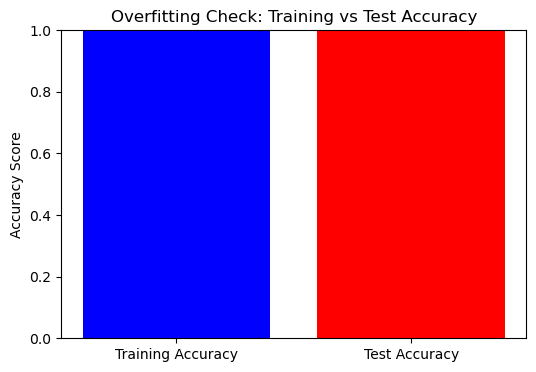

In [31]:
# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Visualize training vs test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Overfitting Check: Training vs Test Accuracy")
plt.show()


In [ ]:
# Define the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],             
    'max_depth': [5, 10, 15, None],              
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'max_features': ['sqrt', 'log2', None],     # Replaced 'auto' with valid options
    'bootstrap': [True, False]                   
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, error_score='raise')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")


In [33]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


In [34]:
# Save the trained model and selected features
joblib.dump(model, "random_forestt_model.pkl")
joblib.dump(selected_features, "selected_features.pkl")

print("Model and selected features saved successfully.")

Model and selected features saved successfully.


In [35]:
import joblib

# Load the trained model
model_path = "random_forestt_model.pkl"
model = joblib.load(model_path)

# Load the selected features
features_path = "selected_features.pkl"
selected_features = joblib.load(features_path)

# Print selected features
print("Extracted Features from the Model:", selected_features)


Extracted Features from the Model: ['Attendance', 'Assignment_Score', 'Midterm_Score', 'Final_Score', 'Outstanding_Balance']


In [32]:
# Sample input data for prediction (replace these values with real student data)
sample_data = {
    "Attendance": [85],  
    "Assignment_Score": [90],
    "Midterm_Score": [78],
    "Final_Score": [88],
    "Outstanding_Balance": [500]
}

# Convert input data into a DataFrame with correct feature names
input_df = pd.DataFrame(sample_data)

# Make prediction
predicted_performance = model.predict(input_df)

print(f"Predicted Performance: {predicted_performance[0]}")


Predicted Performance: 1


In [33]:
# Sample input data for a low-performing student
sample_data = {
    "Attendance": [30],  # Low attendance
    "Assignment_Score": [20],  # Very low assignment scores
    "Midterm_Score": [25],  # Poor midterm performance
    "Final_Score": [35],  # Poor final exam
    "Outstanding_Balance": [5000]  # High unpaid balance
}
# Convert input data into a DataFrame with correct feature names
input_df = pd.DataFrame(sample_data)

# Make prediction
predicted_performance = model.predict(input_df)

print(f"Predicted Performance: {predicted_performance[0]}")

Predicted Performance: 0


In [4]:
import pandas as pd
import pickle

# Load the selected features list
selected_features_path = "selected_features.pkl"
with open(selected_features_path, "rb") as file:
    selected_features = pickle.load(file)

#  Add 'Performance' as the target variable
selected_features.append("Performance")

#  Load the original dataset
file_path = "data_warehouse.csv"  # Update if needed
df = pd.read_csv(file_path)

#  Keep only selected features + target variable
df_selected = df[selected_features]

#  Save as CSV
csv_output_path = "selected_features_with_target.csv"
df_selected.to_csv(csv_output_path, index=False)

print(f" Dataset with selected features & target saved: {csv_output_path}")


 Dataset with selected features & target saved: selected_features_with_target.csv


In [9]:
from mysql.connector import Error
# CSV file path
csv_file = 'selected_features_with_target.csv'

# MySQL database connection details
config = {
    'user': 'root',
    'password': 'Mukunzi@2025',
    'host': 'localhost',
    'database': 'data_warehouse_coco',
    'raise_on_warnings': True
}


In [10]:
try:
    # Read CSV file into pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Establish MySQL connection
    connection = mysql.connector.connect(**config)
    
    if connection.is_connected():
        cursor = connection.cursor()
        
        # Create table (if not exists) - CORRECTED
        create_table_query = """
        CREATE TABLE IF NOT EXISTS student_records (
            attendance DECIMAL(5,2),
            assignment_score DECIMAL(5,2),
            midterm_score DECIMAL(5,2),
            final_score DECIMAL(5,2),
            outstanding_balance INT,
            performance VARCHAR(10)
        )
        """  # Removed semicolon and fixed parentheses
        
        cursor.execute(create_table_query)
        print("Table created successfully")
        
        # Insert data row by row - CORRECTED table name
        insert_query = """
        INSERT INTO student_records
        (attendance, assignment_score, midterm_score, final_score, outstanding_balance, performance)
        VALUES (%s, %s, %s, %s, %s, %s)
        """
        
        # Convert DataFrame to list of tuples
        records = [tuple(x) for x in df.to_numpy()]
        
        # Execute batch insert
        cursor.executemany(insert_query, records)
        connection.commit()
        print(f"Inserted {len(records)} rows successfully")
        
except Error as e:
    print(f"Error while connecting to MySQL: {e}")
    
finally:
    if 'connection' in locals() and connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

NameError: name 'mysql' is not defined